## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time
from itertools import product

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


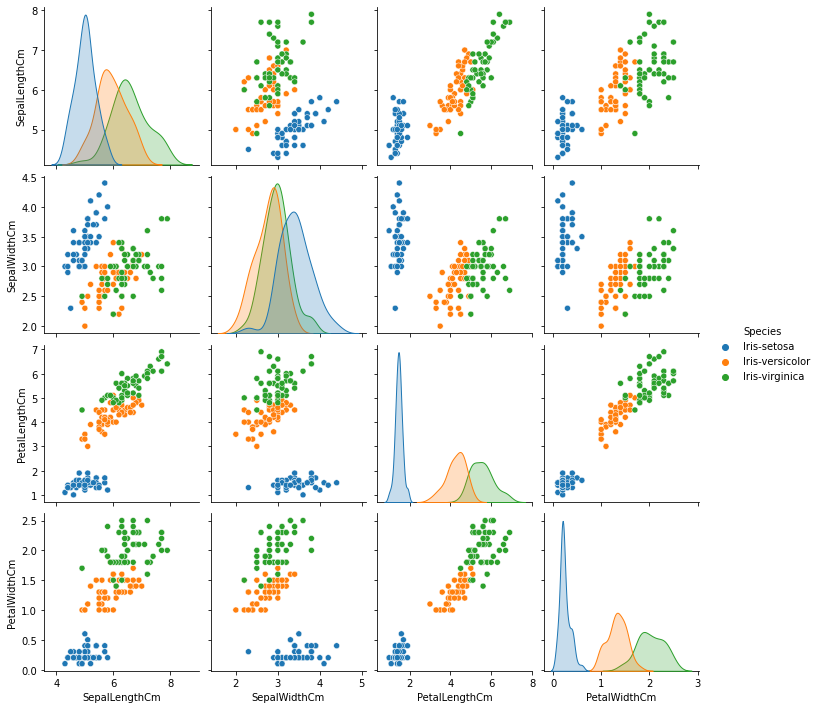

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

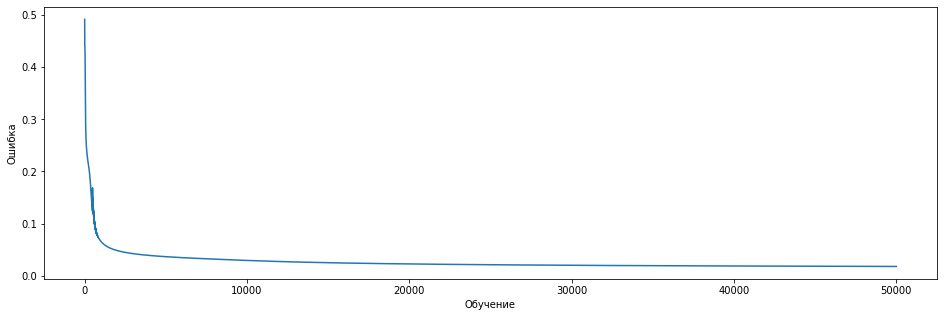

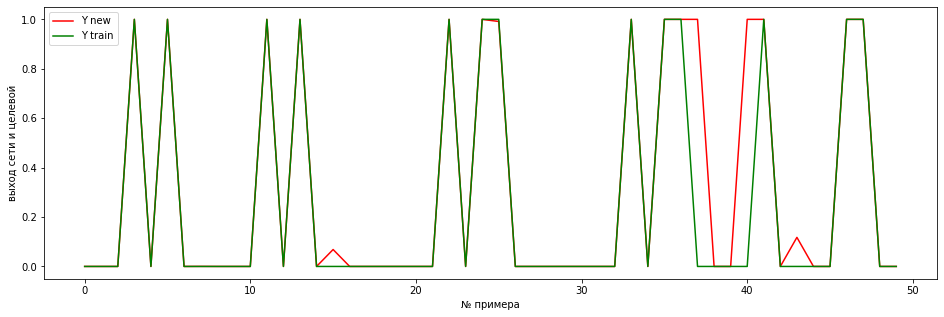

Аккуратность нейронной сети 98.25%


In [4]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 3


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(50000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



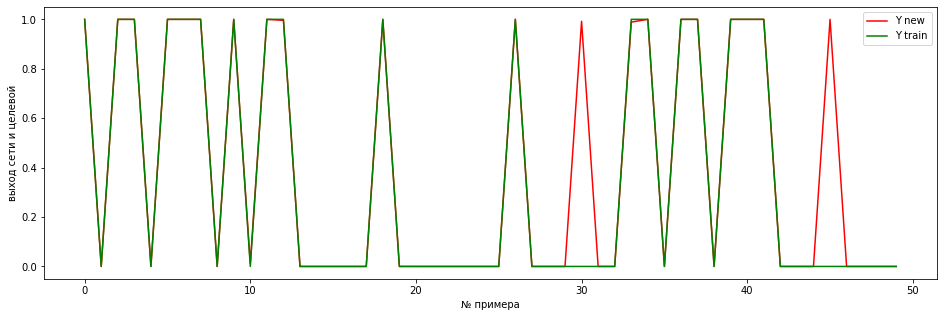

Аккуратность нейронной сети на тесте 97.16%


In [5]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

## Реализация

In [42]:
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [43]:
class NN2layer:
    
    def __init__(self, n_neiron, lr, n_epoch, func='sigmoid', seed=None):
        self.n_neiron = n_neiron
        self.lr = lr
        self.n_epoch = n_epoch
        self.func = func
        if self.func not in ['relu', 'sigmoid']:
            raise KeyError(f'Введите sigmoid или relu для функции')
        self.seed = seed
                
    def __sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def __sigmoid_deriv(self, x):
        return self.__sigmoid(x)*(1 - self.__sigmoid(x))
        
    def __ReLU(self, x):
         return x  *  (x  >  0)   
    
    def __ReLU_deriv(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def __start_weights(self, x_shape, hidden_layer_shape, y_shape):
        if self.seed:
            np.random.seed(self.seed)
        w0 = 2*np.random.random((x_shape, hidden_layer_shape)) - 1
        w1 = 2*np.random.random((hidden_layer_shape, y_shape)) - 1
        return w0, w1
    
    def run_nn(self, X_train, y_train, plot_learning_curve=False):
        errors = []
        
        if self.func == 'sigmoid':
            run_func = self.__sigmoid
            run_func_d = self.__sigmoid_deriv
        elif self.func == 'relu':
            run_func = self.__ReLU
            run_func_d = self.__ReLU_deriv
        
        w0, w1 = self.__start_weights(X_train.shape[1], self.n_neiron, (y_train.shape[1]))
        
        for i in range(self.n_epoch):
            layer0 = X_train
            layer1 = run_func(np.dot(layer0, w0))
            layer2 = run_func(np.dot(layer1, w1))
            
            layer2_error = y_train - layer2
            layer2_delta = layer2_error * run_func_d(layer2)
            
            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * run_func_d(layer1)
            
            w1 += layer1.T.dot(layer2_delta) * self.lr
            w0 += layer0.T.dot(layer1_delta) * self.lr
            
            error = np.mean(np.abs(layer2_error))
            errors.append(error)
            
            self.accuracy = (1 - error) * 100
        
        if plot_learning_curve:
            print("Точность нейронной сети " + str(round(self.accuracy,2)) + "%")
            plt.plot(errors)
            plt.xlabel('Обучение')
            plt.ylabel('Ошибка')
            plt.show()

Точность нейронной сети 85.96%


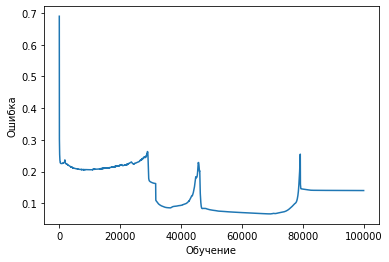

In [44]:
# Тестовый прогон
test1 = NN2layer(n_neiron=10, lr=0.001, n_epoch=100000,  func='relu')
test1.run_nn(X_train, y_train, plot_learning_curve=True)

Кривая ошибки/обучения будет разная при разном random.seed

In [51]:
def compile_grid(grid_dict):
    
    if len(set(grid_dict.keys()) - {'n_neiron', 'n_epoch' ,  'lr', 'func'})>0:
        raise KeyError('неверные ключи')
    
    grid = dict()
    for k, v in grid_dict.items():
        if not isinstance(v, list):
            grid[k] = [v]
        else:
            grid[k] = v
    
    n_neiron = grid['n_neiron']
    n_epoch = grid['n_epoch']
    lr = grid['lr']
    func = grid['func']
    combos = list(product(n_neiron, n_epoch, lr, func))
    return combos
        

In [54]:
#n_epoch = 5000

main_grid = {
    'n_neiron': [1,2,3,4,5,7,10],
    'n_epoch': [500,2500,5000,10000],
    'lr':[0.1, 1e-2, 1e-3, 1e-5, 1e-7],
    'func': ['relu', 'sigmoid']
}


compiled_grid = compile_grid(main_grid)

print(f'{len(compiled_grid)} combinations in total')

210 combinations in total


In [57]:
# запуск расчетов

params, acc = [], []
seed = 77 # Установим фиксированный random seed

full_time = time.time()
idx = 0
for comb in compiled_grid:
    nn = comb[0]
    n_ep = comb[1]
    lr = comb[2]
    fx = comb[3]
    start_time = time.time()
    idx += 1
    print(f'combination {idx} of {len(compiled_grid)} started with params = [{nn}, {n_ep}, {lr}, {fx}].')
    model = NN2layer(n_neiron=nn, lr=lr, n_epoch=n_ep, func=fx, seed = seed)
    accuracy = model.run_nn(X_train, y_train, plot_learning_curve=False)
    params.append(comb)
    acc.append(model.accuracy)
    print(f'...finished in {(time.time() - start_time):.1f} sec')
print(f'Full time elapsed {(time.time() - full_time):.1f} sec')

combination 1 of 210 started with params = [1, 500, 0.1, relu].
...finished in 0.0 sec
combination 2 of 210 started with params = [1, 500, 0.1, sigmoid].
...finished in 0.1 sec
combination 3 of 210 started with params = [1, 500, 0.01, relu].
...finished in 0.0 sec
combination 4 of 210 started with params = [1, 500, 0.01, sigmoid].
...finished in 0.1 sec
combination 5 of 210 started with params = [1, 500, 0.001, relu].
...finished in 0.0 sec
combination 6 of 210 started with params = [1, 500, 0.001, sigmoid].
...finished in 0.1 sec
combination 7 of 210 started with params = [1, 500, 1e-05, relu].
...finished in 0.1 sec
combination 8 of 210 started with params = [1, 500, 1e-05, sigmoid].
...finished in 0.1 sec
combination 9 of 210 started with params = [1, 500, 1e-07, relu].
...finished in 0.1 sec
combination 10 of 210 started with params = [1, 500, 1e-07, sigmoid].
...finished in 0.1 sec
combination 11 of 210 started with params = [1, 2500, 0.1, relu].
...finished in 0.3 sec
combination

c:\Temp/ipykernel_1056/1694489882.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


...finished in 0.3 sec
combination 13 of 210 started with params = [1, 2500, 0.01, relu].
...finished in 0.2 sec
combination 14 of 210 started with params = [1, 2500, 0.01, sigmoid].
...finished in 0.3 sec
combination 15 of 210 started with params = [1, 2500, 0.001, relu].
...finished in 0.2 sec
combination 16 of 210 started with params = [1, 2500, 0.001, sigmoid].
...finished in 0.3 sec
combination 17 of 210 started with params = [1, 2500, 1e-05, relu].
...finished in 0.2 sec
combination 18 of 210 started with params = [1, 2500, 1e-05, sigmoid].
...finished in 0.3 sec
combination 19 of 210 started with params = [1, 2500, 1e-07, relu].
...finished in 0.2 sec
combination 20 of 210 started with params = [1, 2500, 1e-07, sigmoid].
...finished in 0.3 sec
combination 21 of 210 started with params = [1, 5000, 0.1, relu].
...finished in 0.4 sec
combination 22 of 210 started with params = [1, 5000, 0.1, sigmoid].
...finished in 0.7 sec
combination 23 of 210 started with params = [1, 5000, 0.01

...finished in 0.4 sec
combination 103 of 210 started with params = [4, 2500, 0.01, relu].
...finished in 0.3 sec
combination 104 of 210 started with params = [4, 2500, 0.01, sigmoid].
...finished in 0.4 sec
combination 105 of 210 started with params = [4, 2500, 0.001, relu].
...finished in 0.3 sec
combination 106 of 210 started with params = [4, 2500, 0.001, sigmoid].
...finished in 0.4 sec
combination 107 of 210 started with params = [4, 2500, 1e-05, relu].
...finished in 0.3 sec
combination 108 of 210 started with params = [4, 2500, 1e-05, sigmoid].
...finished in 0.4 sec
combination 109 of 210 started with params = [4, 2500, 1e-07, relu].
...finished in 0.3 sec
combination 110 of 210 started with params = [4, 2500, 1e-07, sigmoid].
...finished in 0.4 sec
combination 111 of 210 started with params = [4, 5000, 0.1, relu].
...finished in 0.5 sec
combination 112 of 210 started with params = [4, 5000, 0.1, sigmoid].
...finished in 0.7 sec
combination 113 of 210 started with params = [4,

...finished in 0.3 sec
combination 192 of 210 started with params = [10, 2500, 0.1, sigmoid].
...finished in 0.5 sec
combination 193 of 210 started with params = [10, 2500, 0.01, relu].
...finished in 0.3 sec
combination 194 of 210 started with params = [10, 2500, 0.01, sigmoid].
...finished in 0.5 sec
combination 195 of 210 started with params = [10, 2500, 0.001, relu].
...finished in 0.3 sec
combination 196 of 210 started with params = [10, 2500, 0.001, sigmoid].
...finished in 0.5 sec
combination 197 of 210 started with params = [10, 2500, 1e-05, relu].
...finished in 0.3 sec
combination 198 of 210 started with params = [10, 2500, 1e-05, sigmoid].
...finished in 0.4 sec
combination 199 of 210 started with params = [10, 2500, 1e-07, relu].
...finished in 0.3 sec
combination 200 of 210 started with params = [10, 2500, 1e-07, sigmoid].
...finished in 0.4 sec
combination 201 of 210 started with params = [10, 5000, 0.1, relu].
...finished in 0.6 sec
combination 202 of 210 started with pa

In [60]:
# просмотр результата
params = np.array(params)
acc = np.array(acc)
best_acc = acc.max()
best_params = params[acc.argmax()]

print(f'best accuracy {best_acc:.3f}%')
print('best params')
print(f'n_layers: {best_params[0]}, number epoch: {best_params[1]}, learning rate: {best_params[2]}, activation function: {best_params[3]}')

best accuracy 96.717%
best params
n_layers: 10, number epoch: 5000, learning rate: 0.1, activation function: sigmoid


Точность нейронной сети 96.72%


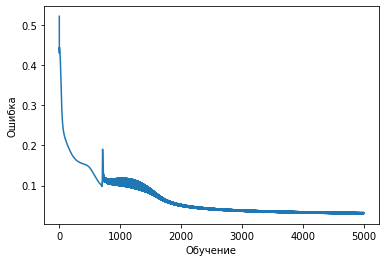

In [61]:
# запуск наилучшей модели
best_model = NN2layer(n_neiron=int(best_params[0]), n_epoch=int(best_params[1]),lr=float(best_params[2]), 
                             func=best_params[3],  seed=seed)
best_model.run_nn(X_train, y_train, plot_learning_curve=True)